<a href="https://colab.research.google.com/github/fmlalonde/git-training/blob/master/chapter02_mathematical-building-blocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Third Edition](https://www.manning.com/books/deep-learning-with-python-third-edition). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

The book's contents are available online at [deeplearningwithpython.io](https://deeplearningwithpython.io).

In [5]:
!pip install keras keras-hub --upgrade -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 947.9/947.9 kB 48.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
keras-nlp 0.21.1 requires keras-hub==0.21.1, but you have keras-hub 0.22.2 which is incompatible.


In [7]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

In [8]:
# @title
import os
from IPython.core.magic import register_cell_magic

@register_cell_magic
def backend(line, cell):
    current, required = os.environ.get("KERAS_BACKEND", ""), line.split()[-1]
    if current == required:
        get_ipython().run_cell(cell)
    else:
        print(
            f"This cell requires the {required} backend. To run it, change KERAS_BACKEND to "
            f"\"{required}\" at the top of the notebook, restart the runtime, and rerun the notebook."
        )

## The mathematical building blocks of neural networks

### A first look at a neural network

In [9]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
train_images.shape

(60000, 28, 28)

In [11]:
len(train_labels)

60000

In [12]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
test_images.shape

(10000, 28, 28)

In [14]:
len(test_labels)

10000

In [15]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [16]:
import keras
from keras import layers

model = keras.Sequential(
    [
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

In [17]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

In [18]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [19]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9231 - loss: 0.2724
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9676 - loss: 0.1103
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9790 - loss: 0.0713
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9855 - loss: 0.0499
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9888 - loss: 0.0369


In [20]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


array([8.9000682e-09, 9.7370808e-08, 4.8493539e-06, 8.3271414e-05,
       1.8403912e-10, 1.9061577e-08, 6.5147614e-12, 9.9991012e-01,
       2.5284311e-07, 1.4262882e-06], dtype=float32)

In [21]:
predictions[0].argmax()

np.int64(7)

In [22]:
predictions[0][7]

np.float32(0.9999101)

In [23]:
test_labels[0]

np.uint8(7)

In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9799 - loss: 0.0695
test_acc: 0.9799000024795532


### Data representations for neural networks

#### Scalars (rank-0 tensors)

In [1]:
import numpy as np
x = np.array(12)
x

array(12)

In [2]:
x.ndim

0

#### Vectors (rank-1 tensors)

In [3]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [4]:
x.ndim

1

#### Matrices (rank-2 tensors)

In [25]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

#### Rank-3 tensors and higher-rank tensors

In [26]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

#### Key attributes

In [27]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [28]:
train_images.ndim

3

In [29]:
train_images.shape

(60000, 28, 28)

In [30]:
train_images.dtype

dtype('uint8')

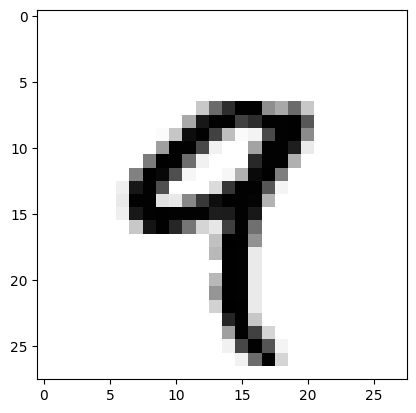

In [31]:
import matplotlib.pyplot as plt

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [32]:
train_labels[4]

np.uint8(9)

#### Manipulating tensors in NumPy

In [33]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [34]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [35]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [36]:
my_slice = train_images[:, 14:, 14:]

In [37]:
my_slice = train_images[:, 7:-7, 7:-7]

#### The notion of data batches

In [38]:
batch = train_images[:128]

In [39]:
batch = train_images[128:256]

In [40]:
n = 3
batch = train_images[128 * n : 128 * (n + 1)]

#### Real-world examples of data tensors

##### Vector data

##### Timeseries data or sequence data

##### Image data

##### Video data

### The gears of neural networks: tensor operations

#### Element-wise operations

In [ ]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [ ]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [ ]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.0)
print("Took: {0:.2f} s".format(time.time() - t0))

In [ ]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

#### Broadcasting

In [ ]:
import numpy as np

X = np.random.random((32, 10))
y = np.random.random((10,))

In [ ]:
y = np.expand_dims(y, axis=0)

In [ ]:
Y = np.tile(y, (32, 1))

In [ ]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [ ]:
import numpy as np

x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

#### Tensor product

In [ ]:
x = np.random.random((32,))
y = np.random.random((32,))

z = np.matmul(x, y)
z = x @ y

In [ ]:
def naive_vector_product(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.0
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [ ]:
def naive_matrix_vector_product(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [ ]:
def naive_matrix_vector_product(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_product(x[i, :], y)
    return z

In [ ]:
def naive_matrix_product(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_product(row_x, column_y)
    return z

#### Tensor reshaping

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))

In [ ]:
x = np.array([[0., 1.],
              [2., 3.],
              [4., 5.]])
x.shape

In [ ]:
x = x.reshape((6, 1))
x

In [ ]:
x = x.reshape((2, 3))
x

In [ ]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

#### Geometric interpretation of tensor operations

#### A geometric interpretation of deep learning

### The engine of neural networks: Gradient-based optimization

#### What's a derivative?

#### Derivative of a tensor operation: the gradient

#### Stochastic gradient descent

#### Chaining derivatives: The Backpropagation algorithm

##### The chain rule

##### Automatic differentiation with computation graphs

### Looking back at our first example

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
model = keras.Sequential(
    [
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

In [ ]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

In [ ]:
model.fit(
    train_images,
    train_labels,
    epochs=5,
    batch_size=128,
)

#### Reimplementing our first example from scratch

##### A simple Dense class

In [ ]:
import keras
from keras import ops

class NaiveDense:
    def __init__(self, input_size, output_size, activation=None):
        self.activation = activation
        self.W = keras.Variable(
            shape=(input_size, output_size), initializer="uniform"
        )
        self.b = keras.Variable(shape=(output_size,), initializer="zeros")

    def __call__(self, inputs):
        x = ops.matmul(inputs, self.W)
        x = x + self.b
        if self.activation is not None:
            x = self.activation(x)
        return x

    @property
    def weights(self):
        return [self.W, self.b]

##### A simple Sequential class

In [ ]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
            x = layer(x)
        return x

    @property
    def weights(self):
        weights = []
        for layer in self.layers:
            weights += layer.weights
        return weights

In [ ]:
model = NaiveSequential(
    [
        NaiveDense(input_size=28 * 28, output_size=512, activation=ops.relu),
        NaiveDense(input_size=512, output_size=10, activation=ops.softmax),
    ]
)
assert len(model.weights) == 4

##### A batch generator

In [ ]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

#### Running one training step

##### The weight update step

In [ ]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign(w - g * learning_rate)

In [ ]:
from keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

##### Gradient computation

In [ ]:
%%backend tensorflow
import tensorflow as tf

x = tf.zeros(shape=())
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
%%backend tensorflow
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        loss = ops.sparse_categorical_crossentropy(labels_batch, predictions)
        average_loss = ops.mean(loss)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

#### The full training loop

In [ ]:
%%backend tensorflow
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [ ]:
%%backend tensorflow
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

#### Evaluating the model

In [ ]:
%%backend tensorflow
predictions = model(test_images)
predicted_labels = ops.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
f"accuracy: {ops.mean(matches):.2f}"